# LECTURE 15: The HR diagram

## IMPORT MODULES

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

## LOAD FILE

%# Download data file. To do only if haven't done already (I assume)

import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

In [2]:
df_stars = pd.read_csv("stars.csv")

df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


# 1 - VISUALIZE DATA

In [3]:
le = LabelEncoder()

# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])

labels = le.inverse_transform(df_stars['Star type']) # star type of each object
class_names = le.classes_ # star types considered

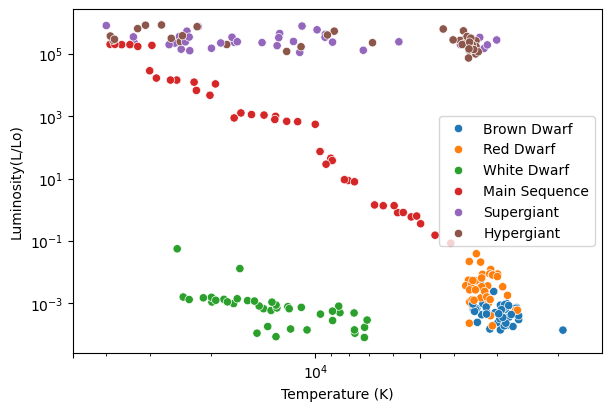

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6,4), layout='constrained')

sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([5000, 10000, 50000])
ax.set_xlim(5e4, 1.5e3)

plt.show()

## CLUSTERING

In [ ]:
# Set up data

column = ['Temperature (K)', 'Luminosity(L/Lo)']
X = np.log10(df_stars[column])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

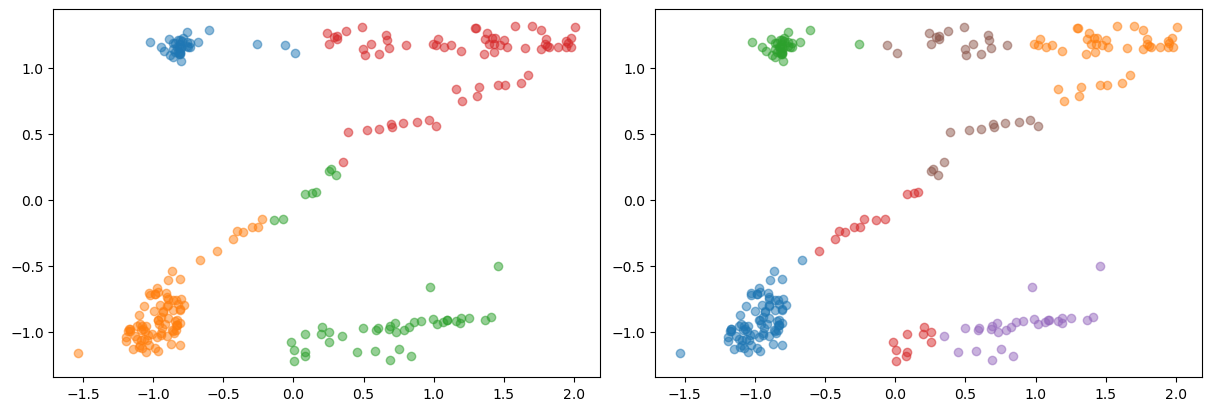

In [29]:
# KMeans algorithm

n_cl = [4, 6]

fig, axs = plt.subplots(1, 2, figsize=(12, 4), layout='constrained')

for cl, ax in zip(n_cl, axs):
    clf = KMeans(n_clusters=cl, n_init='auto')
    clf.fit(X_scaled)
    centers = clf.cluster_centers_ # location of the clusters
    labels = clf.predict(X_scaled)

    colors = ['C1', 'C0', 'C2', 'C3']
    for ii in range(len(labels)):
        ax.scatter(X_scaled[labels==ii, 0], X_scaled[labels==ii, 1], alpha=0.5) # color=colors[ii],

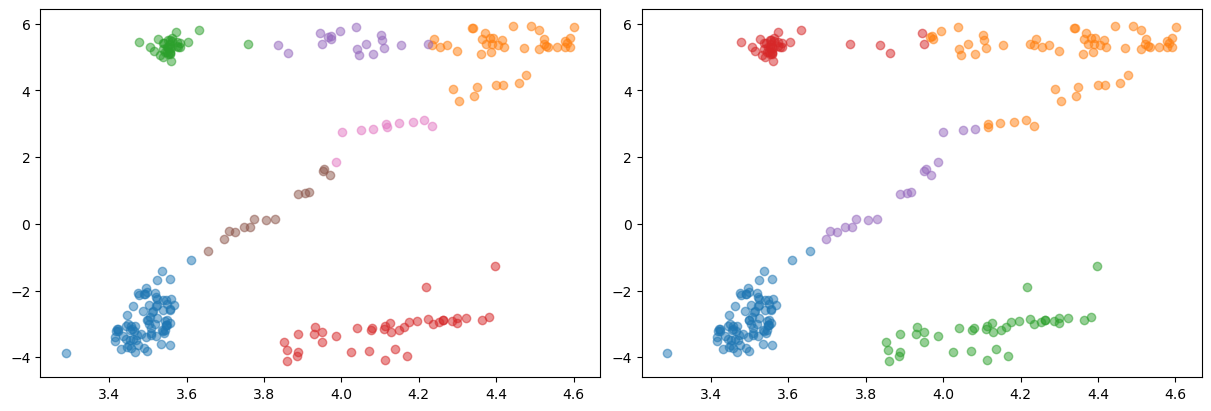

In [28]:
# MeanShift algorithm

bws = [.5, .9]

fig, axs = plt.subplots(1, 2, figsize=(12, 4), layout='constrained')

for bw, ax in zip(bws, axs):
    ms = MeanShift(bandwidth=bw, bin_seeding=True, cluster_all=False)
    ms.fit(X_scaled)
    centers = ms.cluster_centers_ # location of the clusters
    labels = ms.predict(X_scaled)

    colors = ['C1', 'C0', 'C2', 'C3']
    for ii in range(len(labels)):
        ax.scatter(X_scaled[labels==ii, 0], X_scaled[labels==ii, 1], alpha=0.5) # color=colors[ii],

# 2 - PCA WITH NO RESCALING

In [ ]:
n_comp = 4

pca = PCA(n_components=n_comp)

column = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
pca.fit(df_stars[column])
x = pca.fit_transform(df_stars[column])

evals = pca.explained_variance_ratio_

fig, (ax, bx) = plt.subplots(1, 2, figsize=(12, 4))

ax.plot(np.arange(n_comp), evals)
ax.scatter(np.arange(n_comp), evals)

ax.set_xlabel("eigenvalue")
ax.set_ylabel("explained variance ratio")

bx.plot(np.arange(n_comp), evals.cumsum())
bx.scatter(np.arange(n_comp), evals.cumsum())

bx.set_xlabel("eigenvalue number")
bx.set_ylabel("cumulative explained variance ratio")

plt.show()

# 2 - PCA ON RESCALED DATA

In [40]:
# Rescale data

column = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
X = df_stars[column].copy()
X[column[0:2]] = np.log10(X[column[0:2]])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

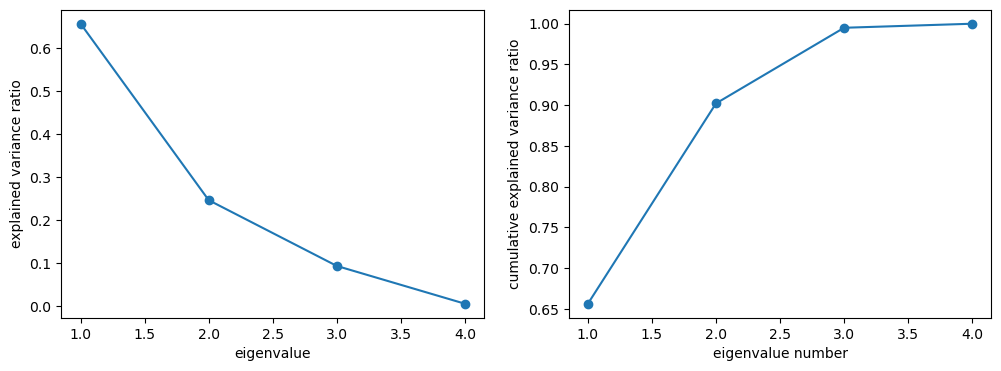

In [41]:
n_comp = 4

pca = PCA(n_components=n_comp)
pca.fit(X_scaled)

evals = pca.explained_variance_ratio_

fig, (ax, bx) = plt.subplots(1, 2, figsize=(12, 4))

ax.plot(np.arange(n_comp) + 1, evals)
ax.scatter(np.arange(n_comp) + 1, evals)

ax.set_xlabel("eigenvalue")
ax.set_ylabel("explained variance ratio")

bx.plot(np.arange(n_comp) + 1, evals.cumsum())
bx.scatter(np.arange(n_comp) + 1, evals.cumsum())

bx.set_xlabel("eigenvalue number")
bx.set_ylabel("cumulative explained variance ratio")

plt.show()

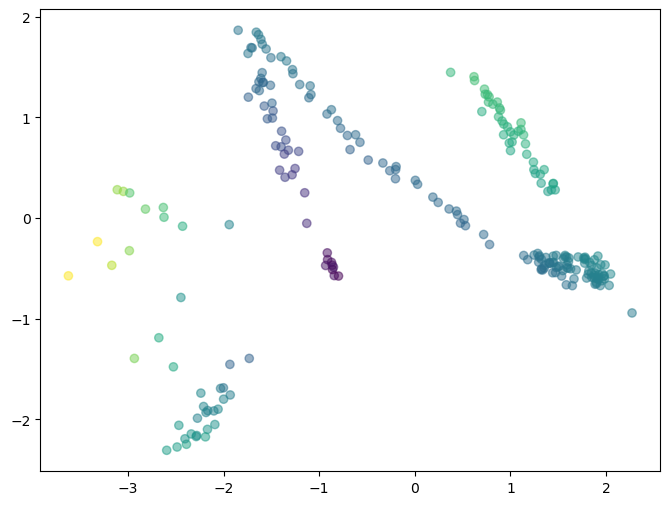

In [42]:
x = pca.transform(X_scaled)
comp = pca.components_
#scaler.inverse_transform(X_scaled)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.scatter(x[:, 0], x[:, 1], c=x[:, 2], alpha=.5)

#ax.set_xscale('log')
#ax.set_yscale('log')

plt.show()

## CLUSTER

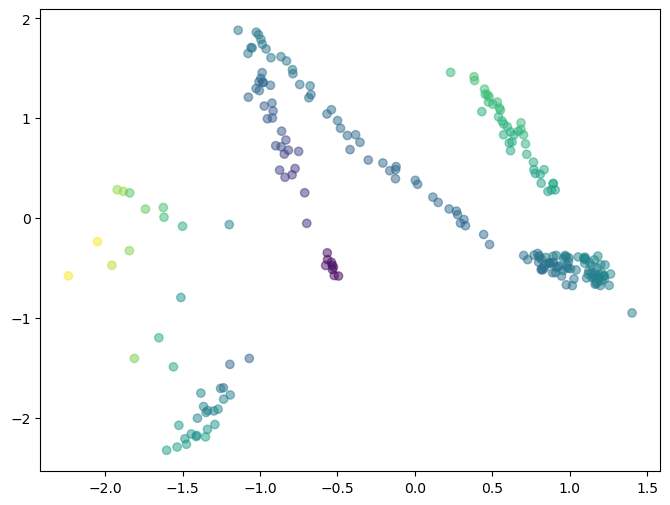

In [43]:
mm_scaler = MinMaxScaler((0, 2))
x_scaled = scaler.fit_transform(x)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.scatter(x_scaled[:, 0], x_scaled[:, 1], c=x_scaled[:, 2], alpha=.5)

#ax.set_xscale('log')
#ax.set_yscale('log')

plt.show()

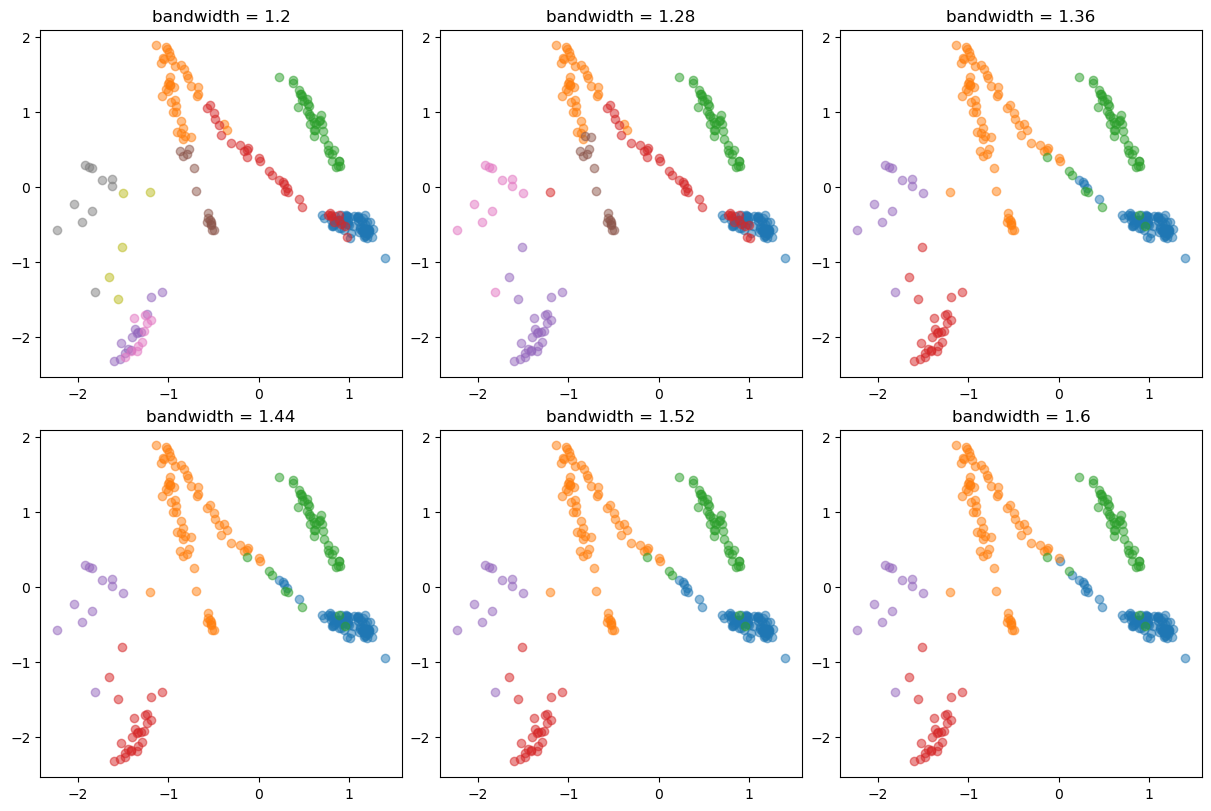

In [49]:
# MeanShift algorithm

bws = np.linspace(1.2, 1.6, 6)

fig = plt.figure(figsize=(12, 8), layout='constrained')

for i, bw in enumerate(bws):
    ms = MeanShift(bandwidth=bw, bin_seeding=True, cluster_all=False)
    ms.fit(x_scaled)
    centers = ms.cluster_centers_ # location of the clusters
    labels = ms.predict(x_scaled)

    ax = fig.add_subplot(2, 3, i+1)
    for ii in range(len(labels)):
        ax.scatter(x_scaled[labels==ii, 0], x_scaled[labels==ii, 1], alpha=0.5)
    ax.set_title('bandwidth = ' + str(bw))